Do the same to exp smoothing smoothing

feature engineering

cross validation?

ARIMA

FBProphet

In [1]:
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations
import matplotlib.pyplot as plt  # plots
import seaborn as sns  # more plots
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings  
warnings.filterwarnings("ignore") # `do not disturbe` mode

In [2]:
#  Little Data Cleaning
df = pd.read_csv("orders.csv")
df = df.loc[df['payment_cost']!=0]
df = df.dropna()

In [3]:
# Converting to date-time
df = df[['created_at_utc','payment_cost']]
df['created_at_utc'] = pd.to_datetime(df.created_at_utc,unit='s')
df.sort_values(by=['created_at_utc'], inplace=True)

''' We remove data frome these years, because of their obsoleteness. 
    Please see notebook "Visual Data analysis: Time depended visualization"'''

df = df.loc[(df['created_at_utc'].dt.year != 2017) & (df['created_at_utc'].dt.year != 2018)] 
df.set_index('created_at_utc', inplace=True)

In [4]:
# Creating a copy of the initial dataframe to make various transformations
data = df.copy()
data.columns = ["y"]

In [23]:
data

,y
created_at_utc,
2019-01-05 20:09:43,169.0
2019-01-22 00:12:17,813.0
2019-01-22 04:07:22,960.0
2019-01-23 21:03:15,1124.0
2019-01-24 22:37:17,291.0
...,...
2021-05-26 12:14:23,83.7
2021-05-26 16:03:56,115.5
2021-05-26 18:43:35,120.0


## Exponential Smoothing

In [5]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

In [71]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    
    if type(alphas) == float:
        
        alpha = alphas
        
        plt.figure(figsize=(10, 4))
        plt.plot(np.array(data.index), exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(np.array(data.index), series.values, "c",alpha = 0.3, label="Actual")
        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True)
        plt.show()       

        data_exp = exponential_smoothing(series, alpha)
        
        return data_exp
    
    elif type(alphas) == list:
        
        data_exps = []
    
        for alpha in alphas:
            plt.figure(figsize=(10, 4))
            plt.plot(np.array(data.index), exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
            plt.plot(np.array(data.index), series.values, "c",alpha = 0.3, label="Actual")
            plt.legend(loc="best")
            plt.axis("tight")
            plt.title("Exponential Smoothing")
            plt.grid(True)
            plt.show()       

            data_exps.append(exponential_smoothing(series, alpha))
    
        return data_exps

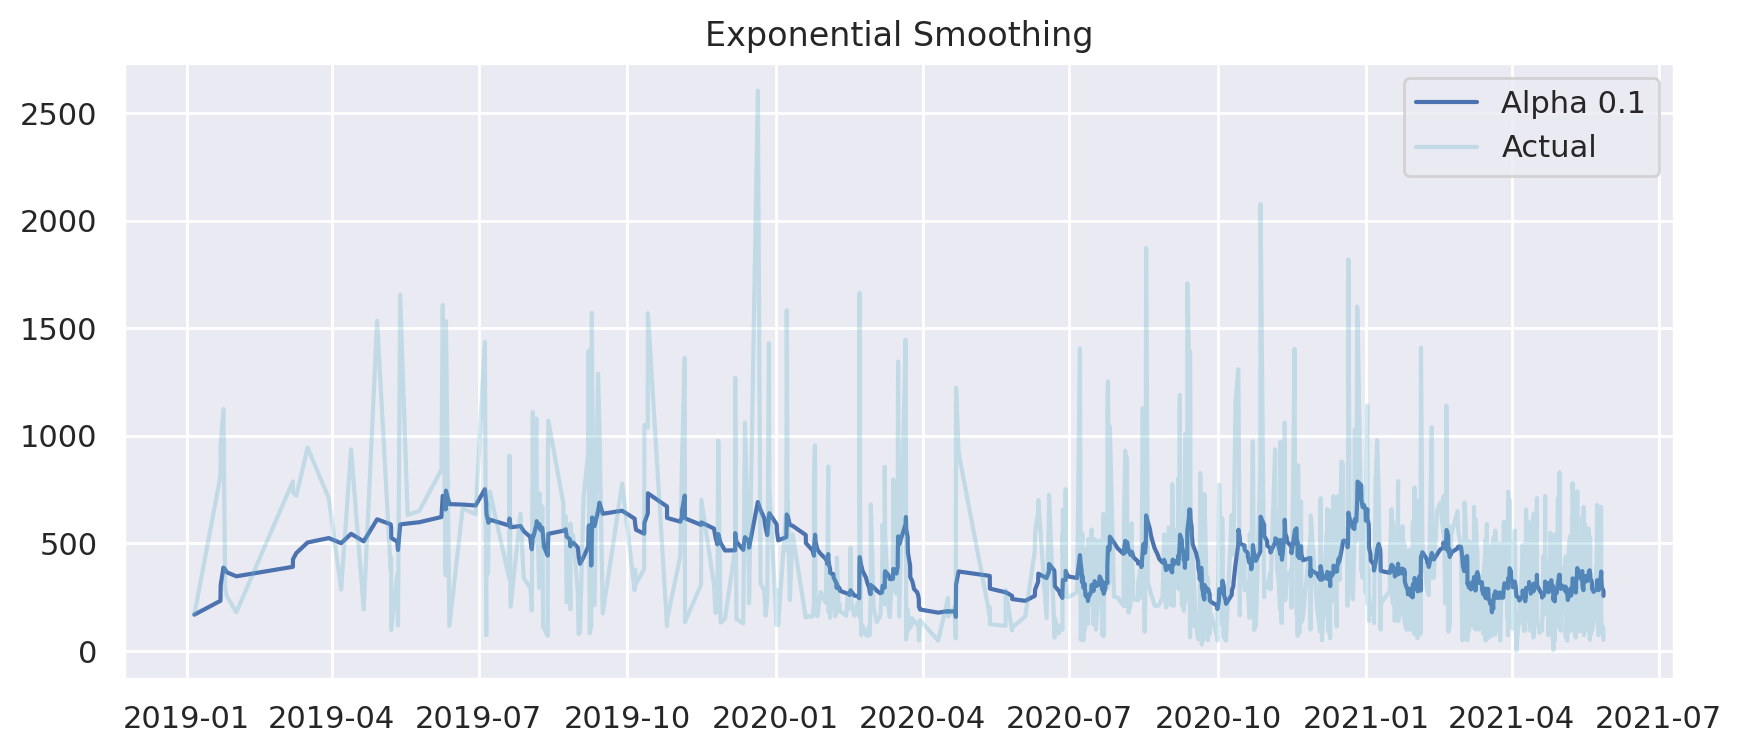

In [72]:
_ = plotExponentialSmoothing(data.y, 0.1)

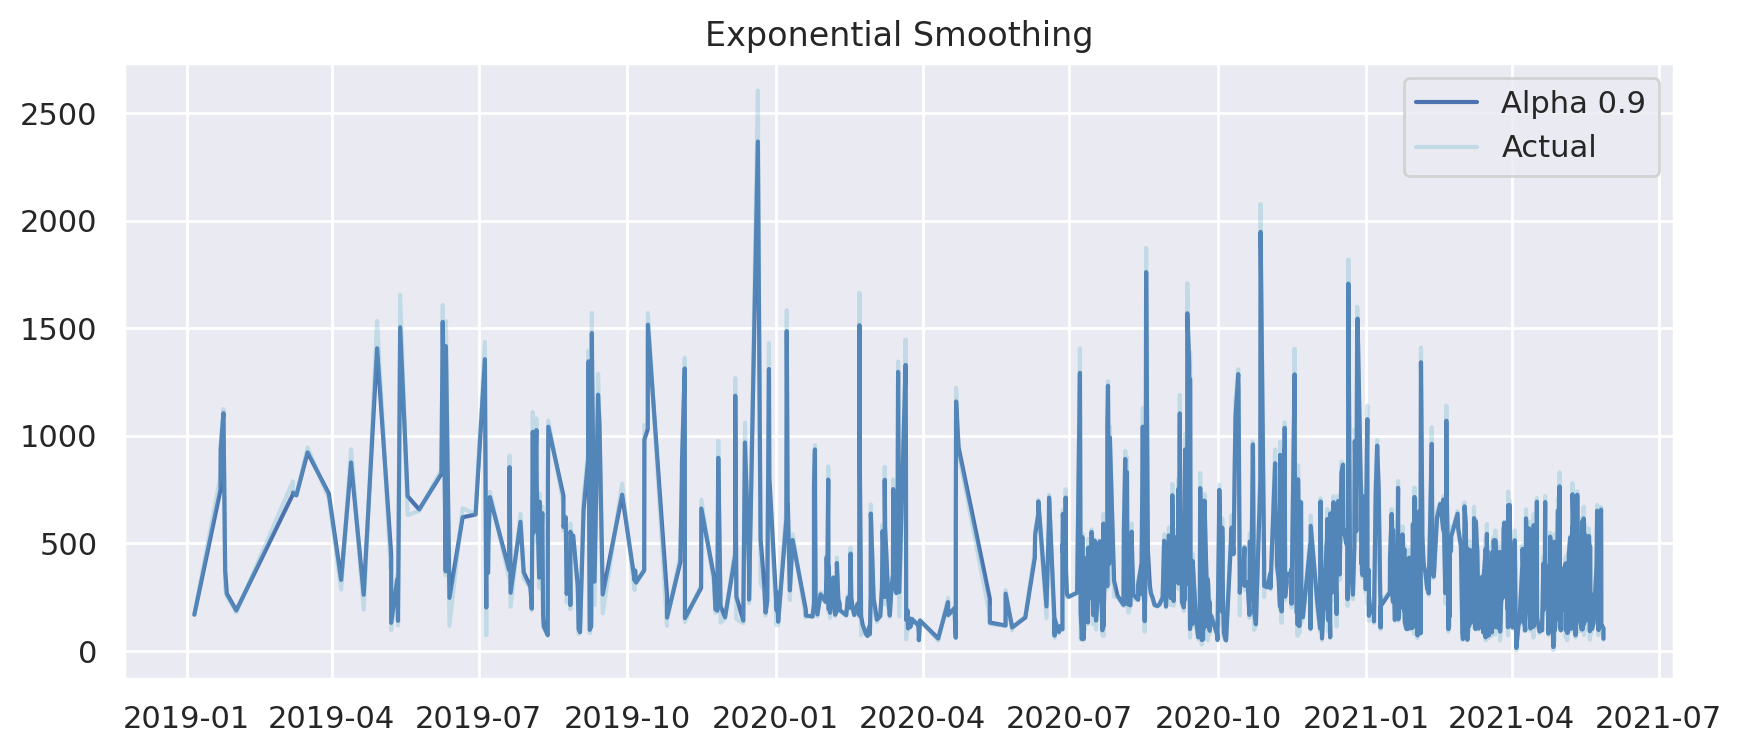

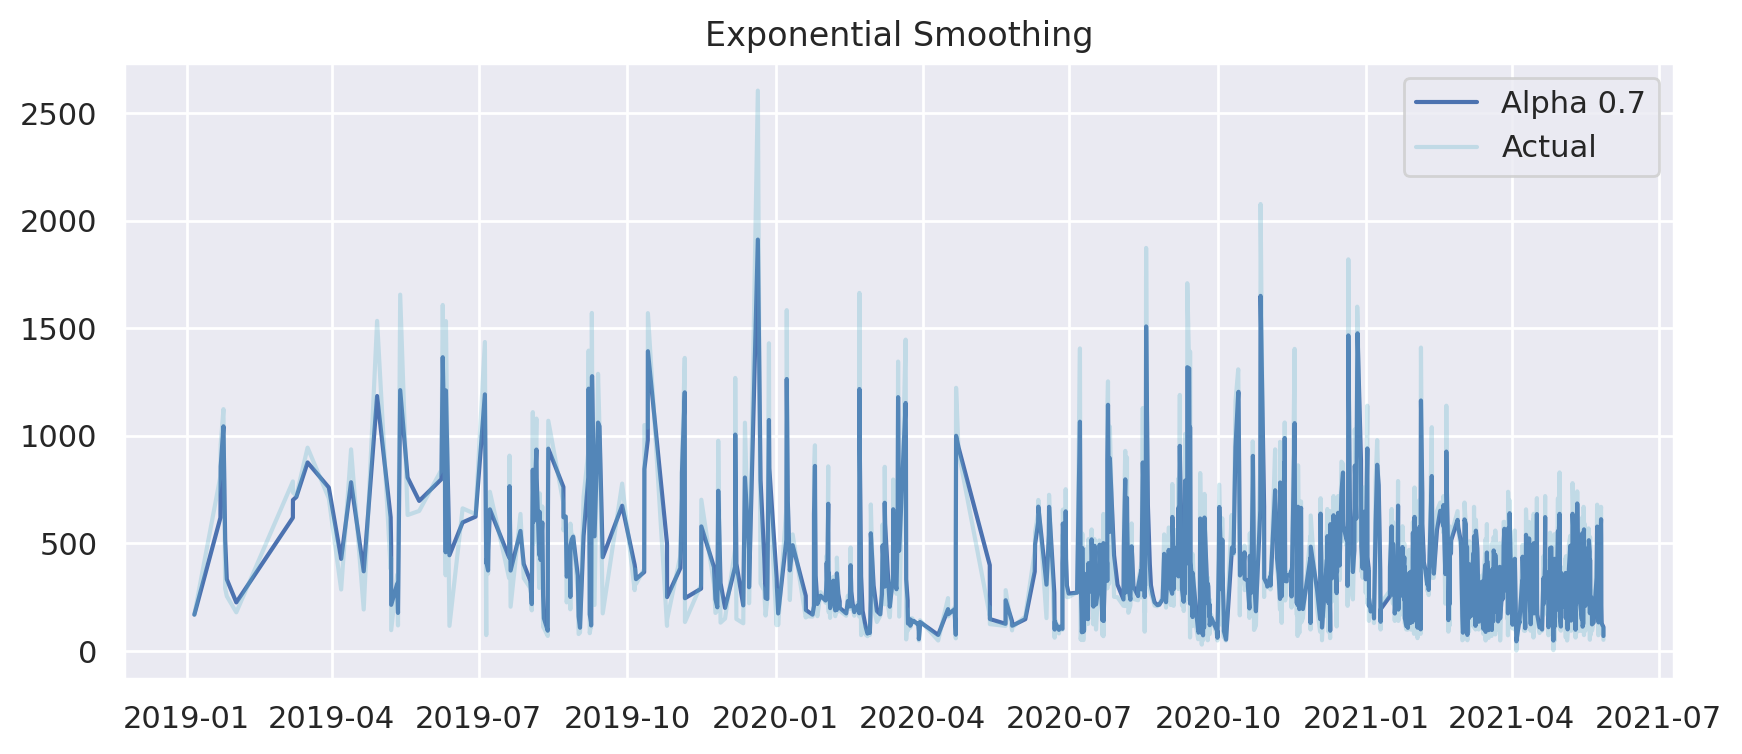

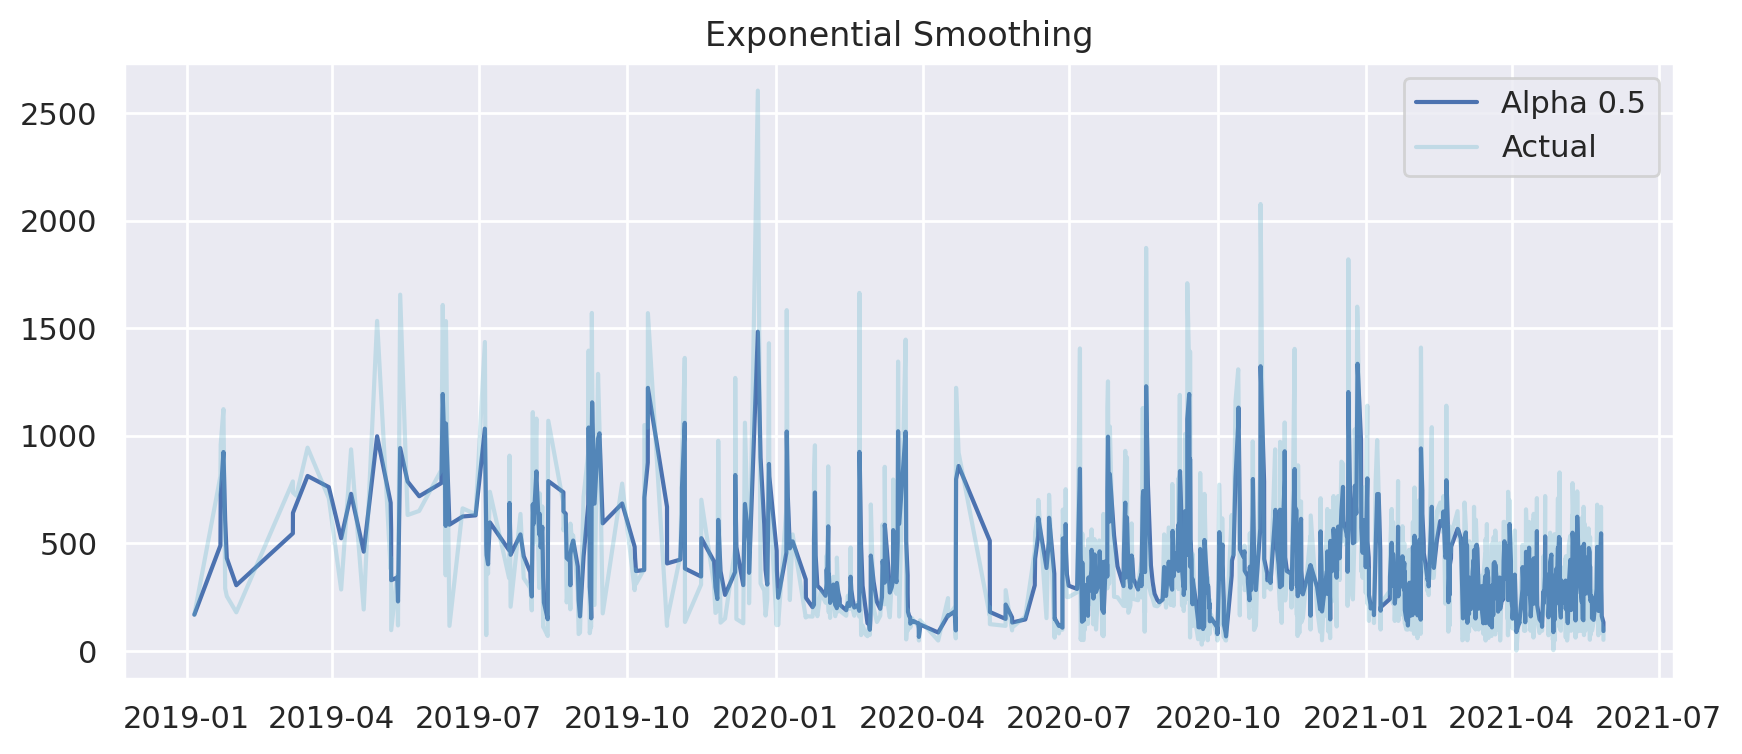

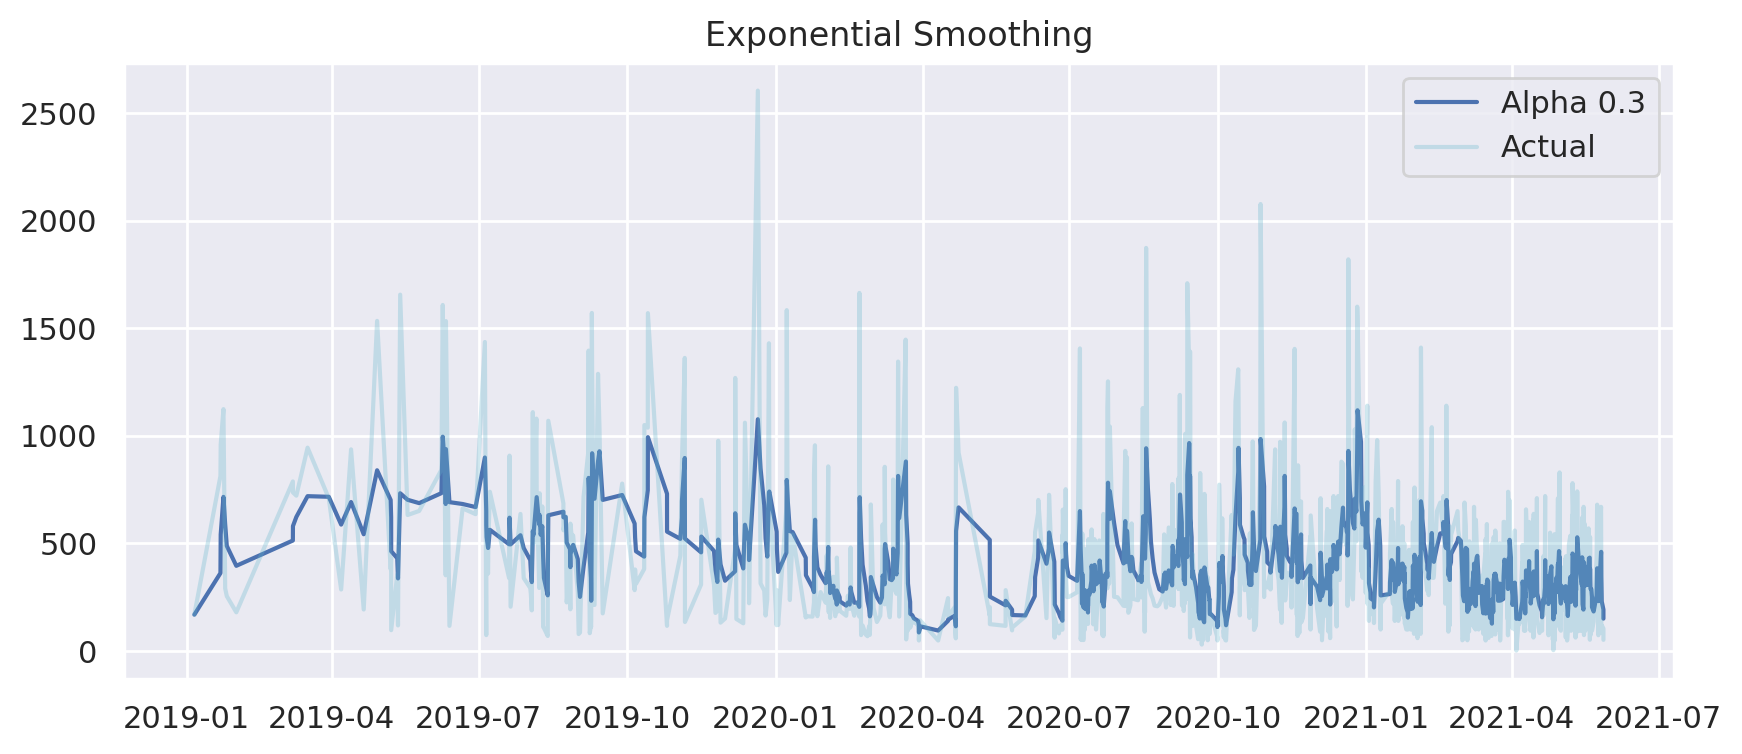

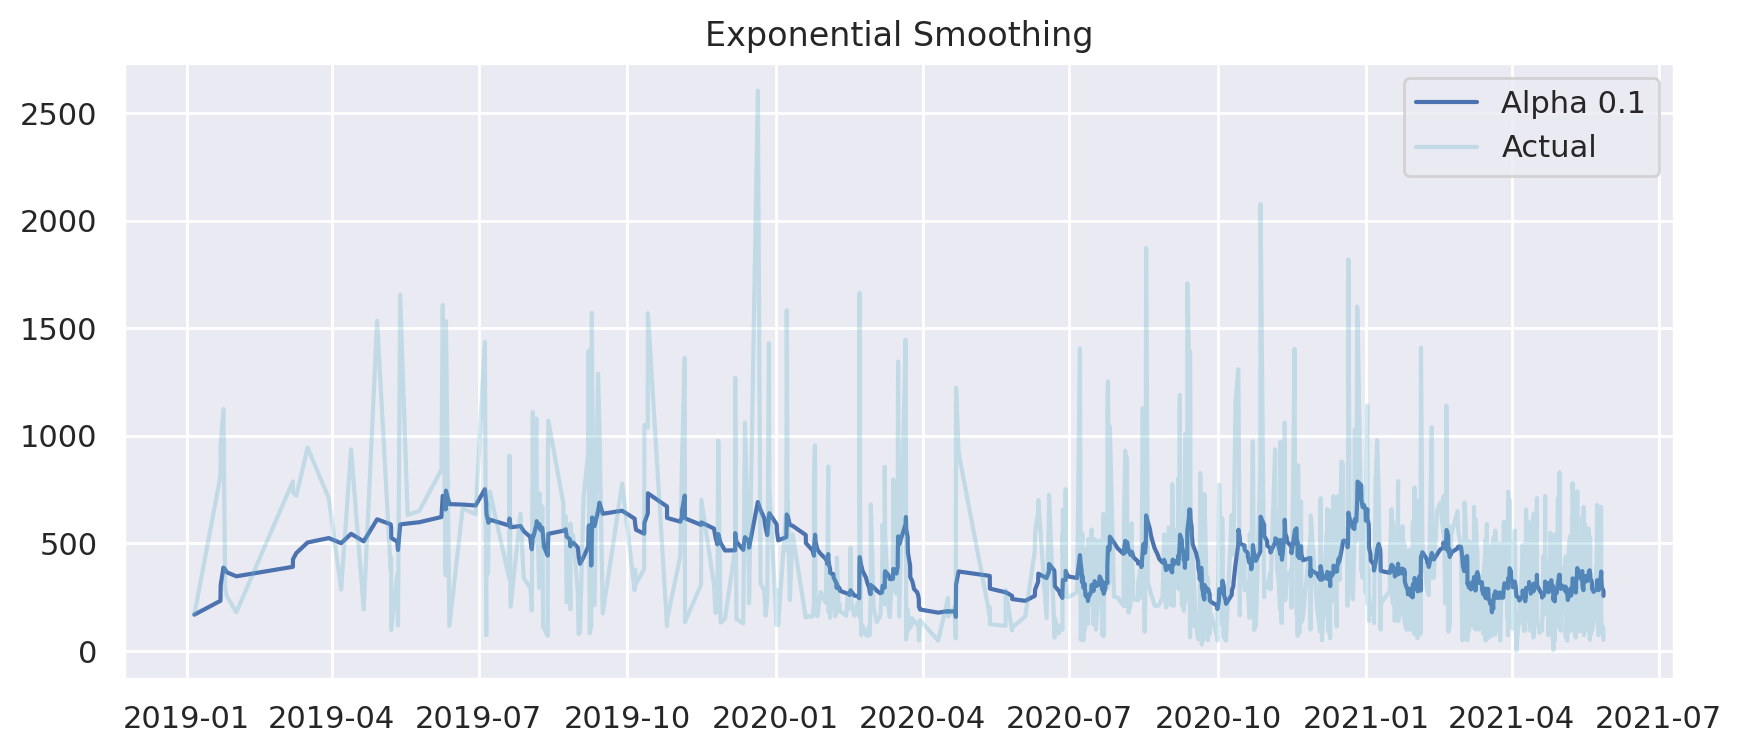

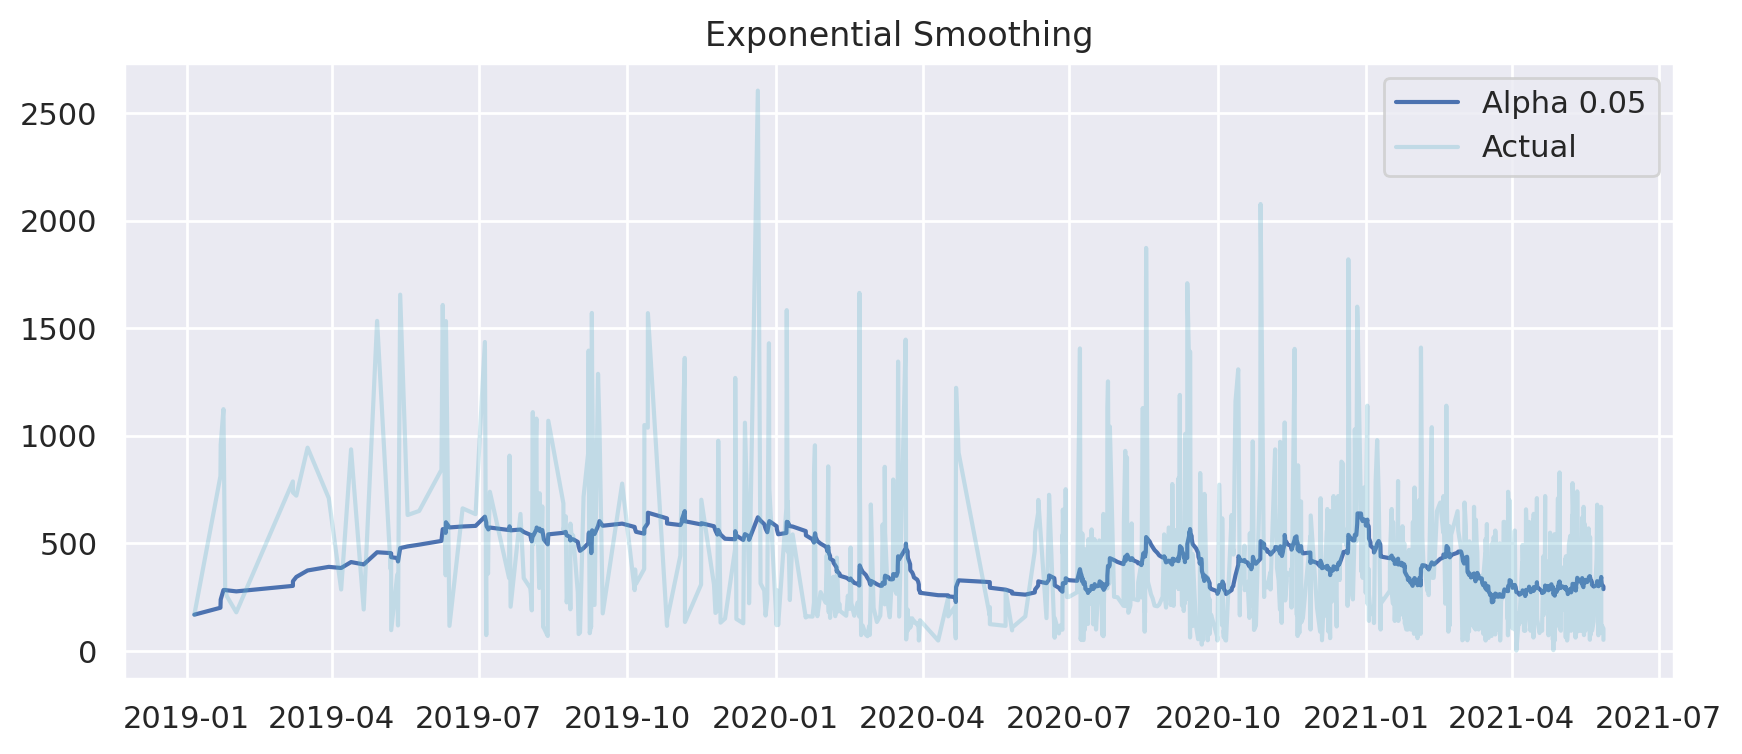

In [31]:
alphas = [0.9, 0.7, 0.5, 0.3, 0.1, 0.05]
data_exps = plotExponentialSmoothing(data.y, alphas)

In [ ]:
alpha = 0.3
data_exp = pd.DataFrame({'y':exponential_smoothing(data.y,alpha=alpha)},index=data.index)

In [ ]:
def model_steps(data, var, add_features=False):
    
    if add_features:        
        data.index = pd.to_datetime(data.index)
        data["hour"] = data.index.hour
        data["weekday"] = data.index.weekday
        data["is_weekend"] = data.weekday.isin([5, 6]) * 1
        
    # Adding the lag of the target variable
    for i in range(1, 10): 
        data_rm["lag_{}".format(i)] = data_rm.y.shift(i)       
    
    X =  data_rm.dropna().drop(["y"], axis=1)
    y =  data_rm.dropna().y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,\
                                                                   shuffle=False)
    model.fit(X_train, y_train)
    
    if plot_graph:
        plotExponentialSmoothing(data, var)
        error = plotModelResults(model, X_train, y_train,\
                                            X_test, y_test, var=var, plot_graph=True)
        if show_lags:
                plotCoefficients(model, X_train)
    else:
        error = plotModelResults(model, X_train, y_train,\
                                           X_test, y_test, var=var)
        return error
    
    pass

In [ ]:
def model_steps(data, var=alpha)

In [10]:
from Function_List import mean_absolute_percentage_error, plotModelResults, plotCoefficients

In [47]:
for i, data_exp in enumerate(data_exps):
    data_exps[i] = pd.DataFrame({'y':exponential_smoothing(data.y,alpha=0.3)},index=data.index)

In [ ]:
for j, data_exp in enumerate(data_exps):
    for i in range(1, 10): 
        data_rm["lag_{}".format(i)] = data_rm.y.shift(i)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

NameError: name 'X' is not defined

In [ ]:
def alpha_choice_arr(alphas, model):
    data_exps = plotExponentialSmoothing(data.y, alphas, test_size)
    
    for i, data_exp in enumerate(data_exps):
        data_exps[i] = pd.DataFrame({'y':exponential_smoothing(data.y,alpha=0.3)},index=data.index)
    
    